# Import Library

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load Dataset

In [2]:
path_1 = 'gdrive/My Drive/DigitalSkola/Dataset/order_details.csv'
path_2 = 'gdrive/My Drive/DigitalSkola/Dataset/order_lists.csv'

details = pd.read_csv(path_1)
lists = pd.read_csv(path_2)

In [3]:
# Join Dataset
dataset = pd.merge(details, lists, how='right', on='order_id')
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


# Customization Chart

## Image

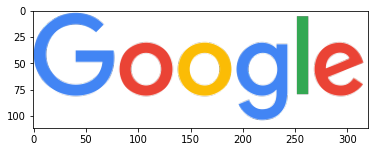

In [4]:
img = plt.imread("https://www.google.co.id/images/branding/googlelogo/2x/googlelogo_color_160x56dp.png")
plt.imshow(img)
plt.show()

# Subplot

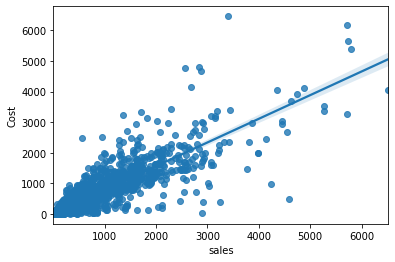

In [7]:
sns.regplot(x='sales', y='Cost', data=dataset)
plt.show()

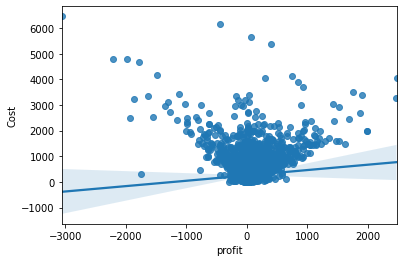

In [8]:
sns.regplot(x='profit', y='Cost', data=dataset)
plt.show()

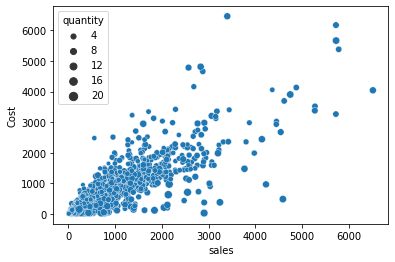

In [9]:
sns.scatterplot(x='sales', y='Cost', size='quantity', data=dataset)
plt.show()

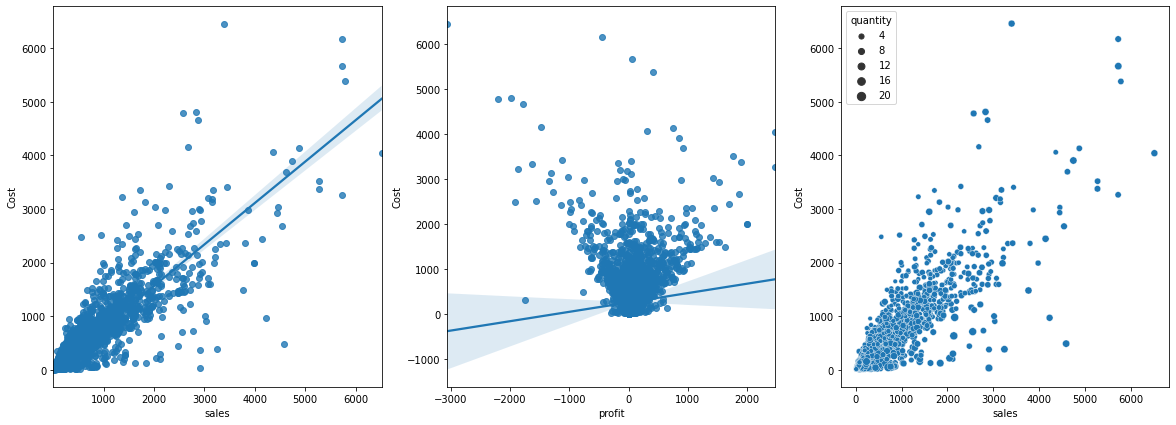

In [13]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.regplot(x='sales', y='Cost', data=dataset)

plt.subplot(1, 3, 2)
sns.regplot(x='profit', y='Cost', data=dataset)

plt.subplot(1, 3, 3)
sns.scatterplot(x='sales', y='Cost', size='quantity', data=dataset)

plt.show()

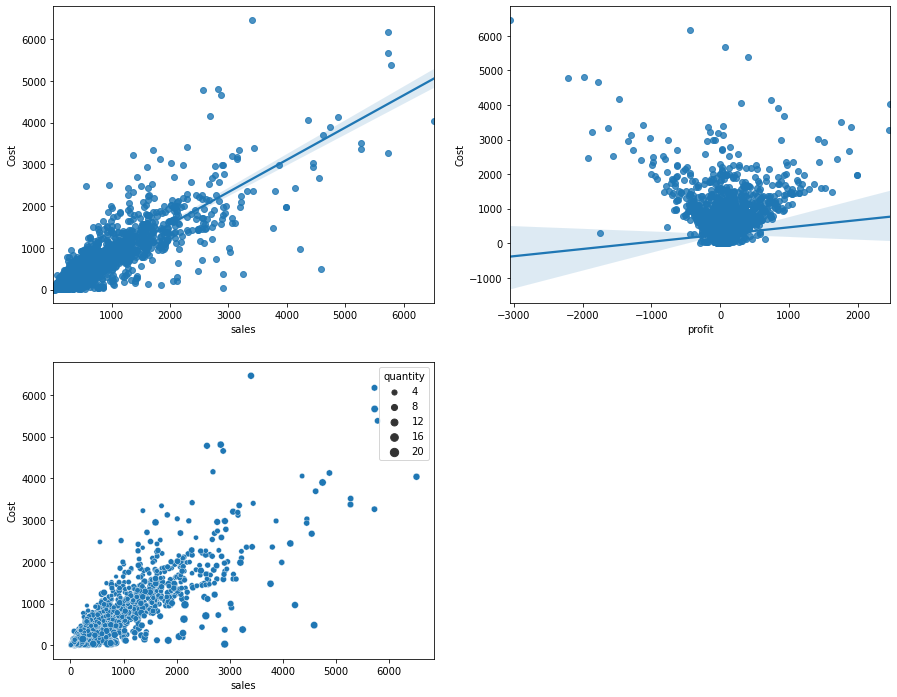

In [15]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.regplot(x='sales', y='Cost', data=dataset)

plt.subplot(2, 2, 2)
sns.regplot(x='profit', y='Cost', data=dataset)

plt.subplot(2, 2, 3)
sns.scatterplot(x='sales', y='Cost', size='quantity', data=dataset)

plt.show()

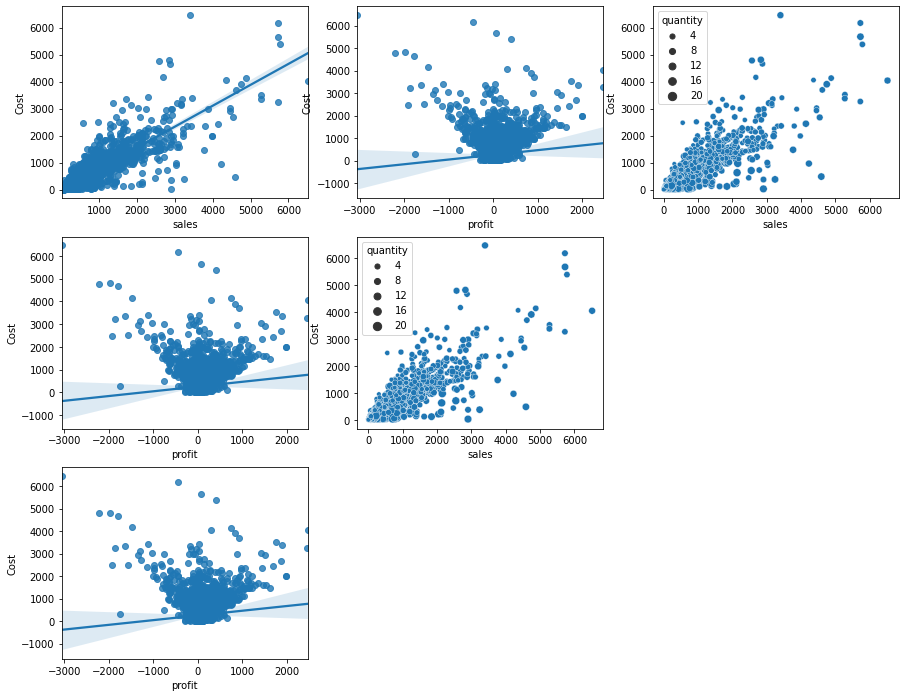

In [16]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 3, 1)
sns.regplot(x='sales', y='Cost', data=dataset)

plt.subplot(3, 3, 2)
sns.regplot(x='profit', y='Cost', data=dataset)

plt.subplot(3, 3, 3)
sns.scatterplot(x='sales', y='Cost', size='quantity', data=dataset)

plt.subplot(3, 3, 4)
sns.regplot(x='profit', y='Cost', data=dataset)

plt.subplot(3, 3, 5)
sns.scatterplot(x='sales', y='Cost', size='quantity', data=dataset)

plt.subplot(3, 3, 7)
sns.regplot(x='profit', y='Cost', data=dataset)

plt.show()

In [19]:
def hist_viz(dataset, columns, dim, size=(15, 15)):
    i = 1
    plt.figure(figsize=size)
    for col in columns:
        plt.subplot(dim[0], dim[1], i)
        sns.histplot(data=dataset, x=col)
        i = i + 1
    plt.show()

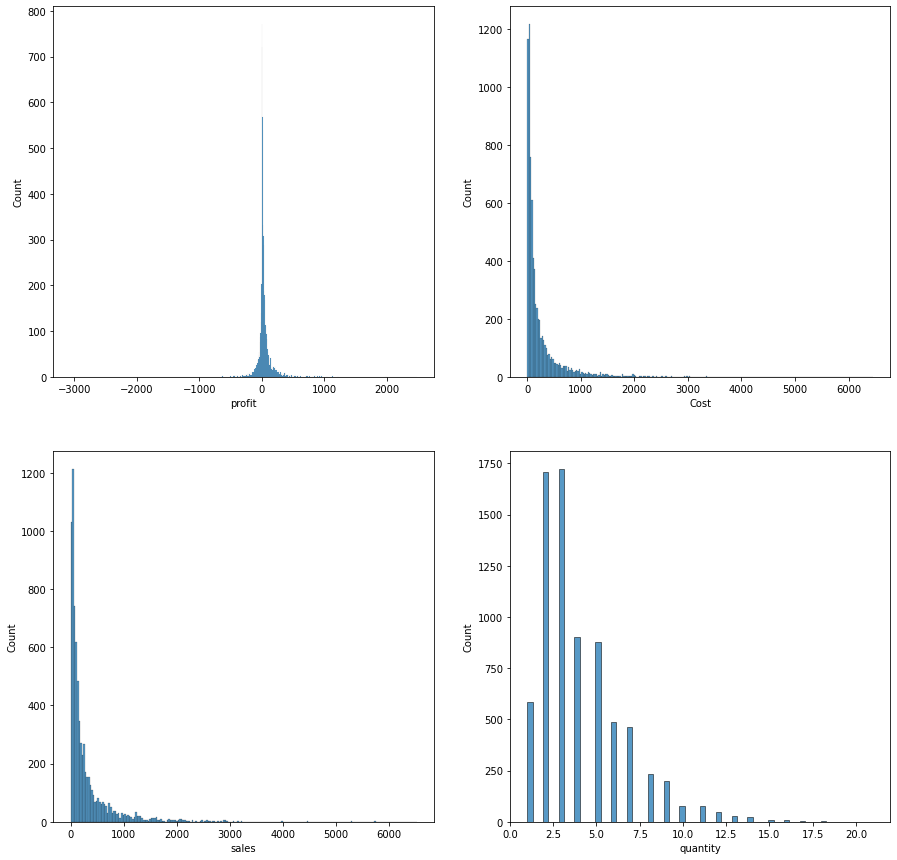

In [20]:
hist_viz(dataset=dataset, columns=['profit', 'Cost', 'sales', 'quantity'], dim=[2, 2])

# Legend and Label

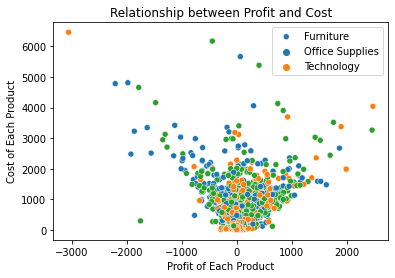

In [33]:
plt.title('Relationship between Profit and Cost')
sns.scatterplot(x='profit', y='Cost', hue='category', data=dataset)
plt.xlabel('Profit of Each Product')
plt.ylabel('Cost of Each Product')
# Ganti Legend
plt.legend({'Furniture':'F', 'Office Supplies':'O', 'Technology':'T'})
plt.show()

# Color

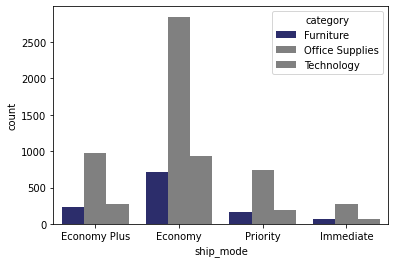

In [49]:
sns.countplot(data=dataset, x='ship_mode', palette=['#212376','grey','grey','grey'], hue='category')
plt.show()

# SweetViz

In [50]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 306kB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [4]:
import sweetviz as sv

In [24]:
my_report = sv.analyze(dataset[['profit', 'sales', 'Cost', 'quantity']].sample(frac=0.2))

                                             |          | [  0%]   00:00 -> (? left)


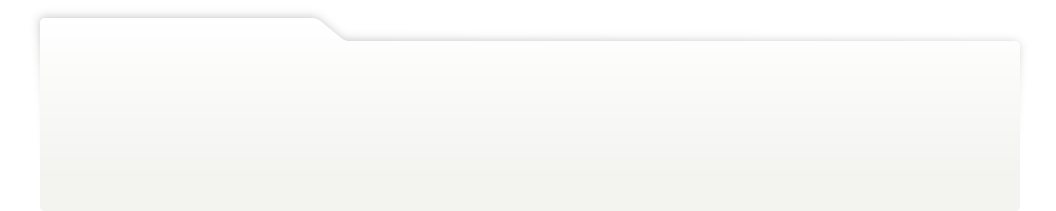
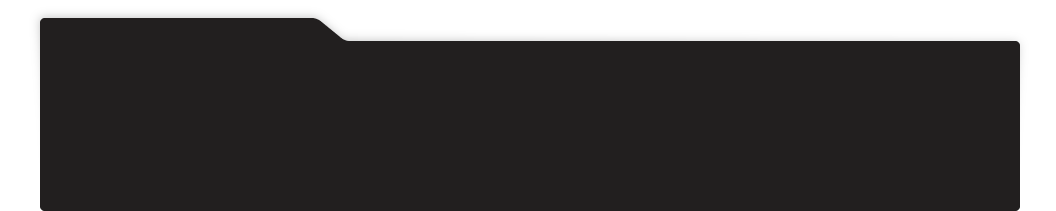
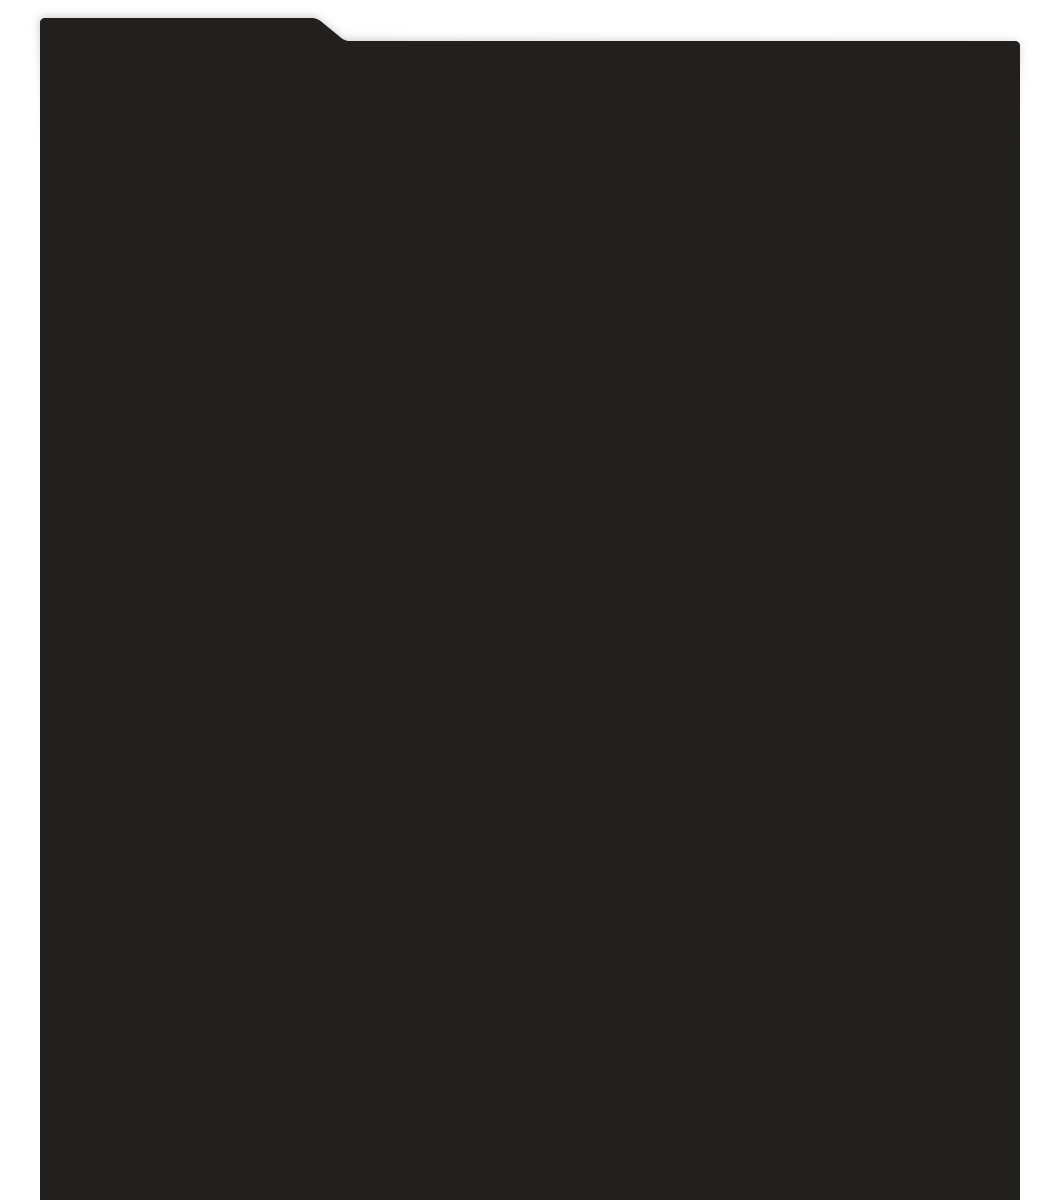
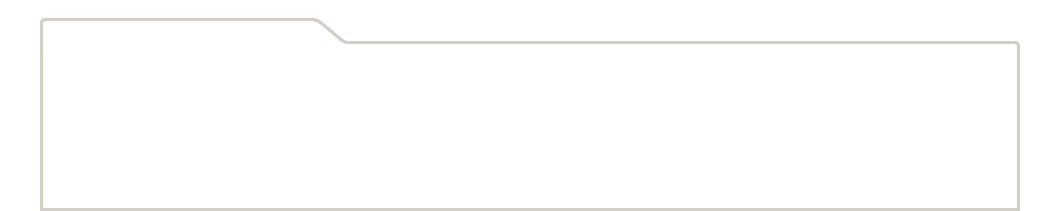
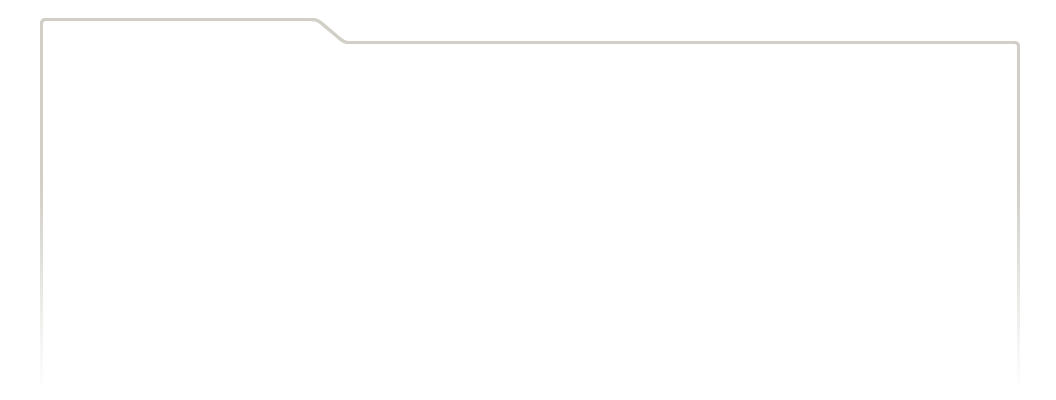
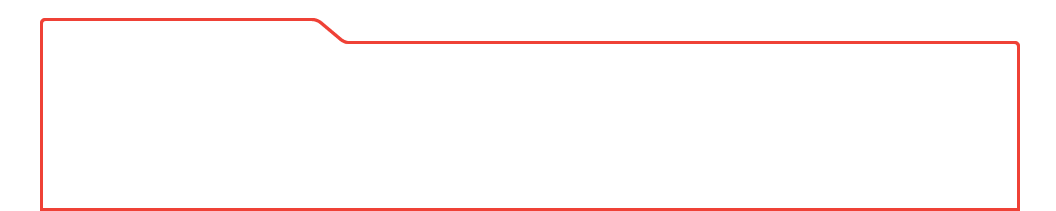
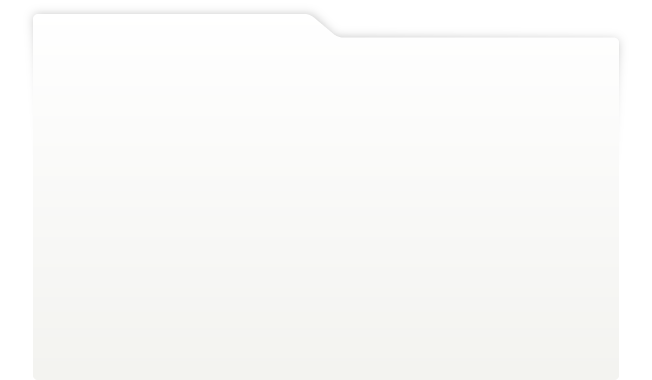
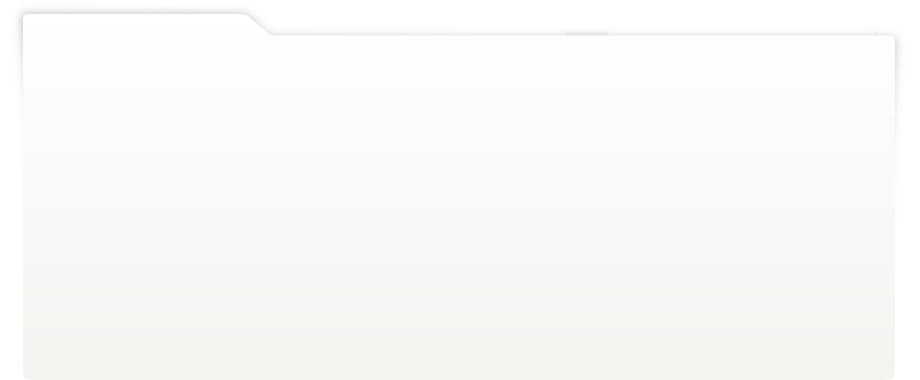
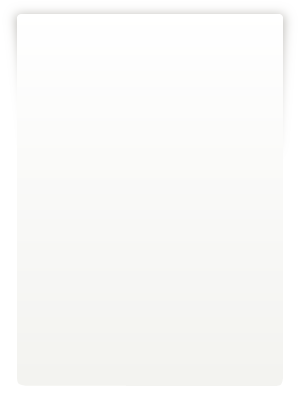
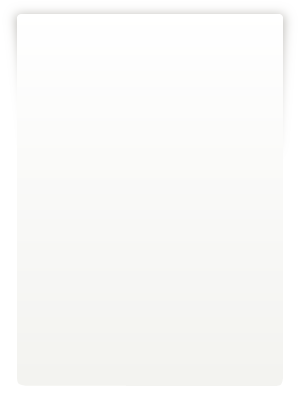
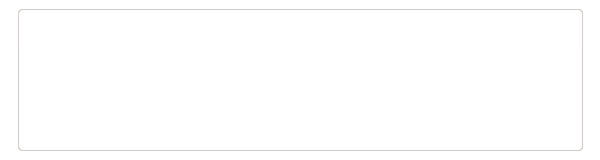
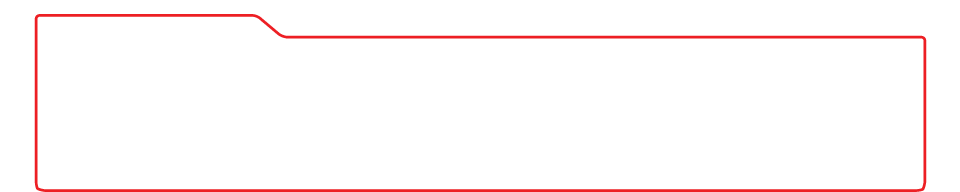
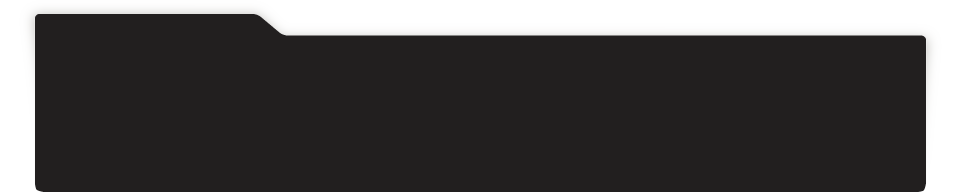
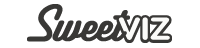
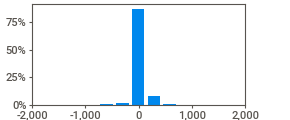
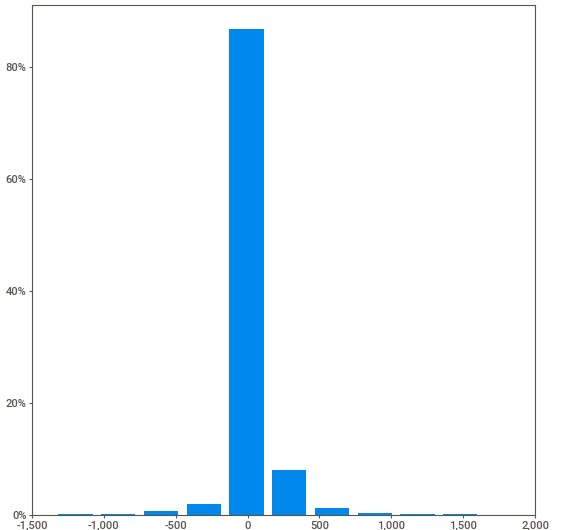
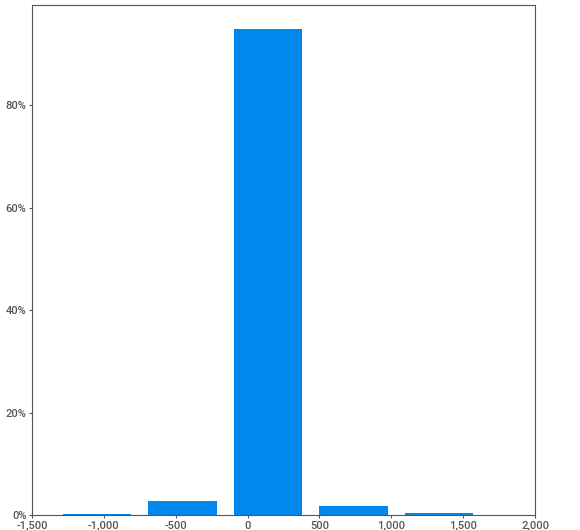
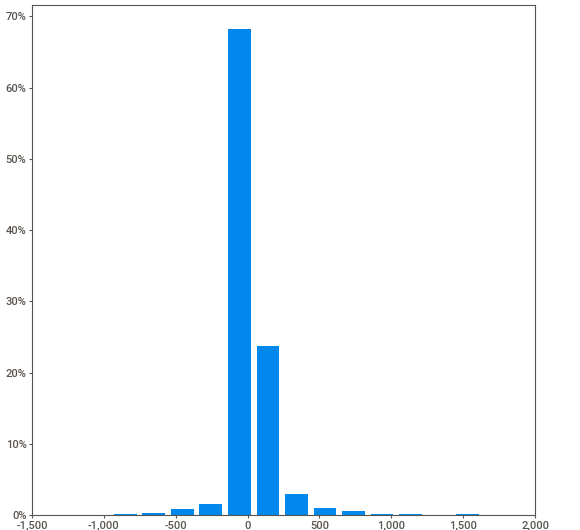
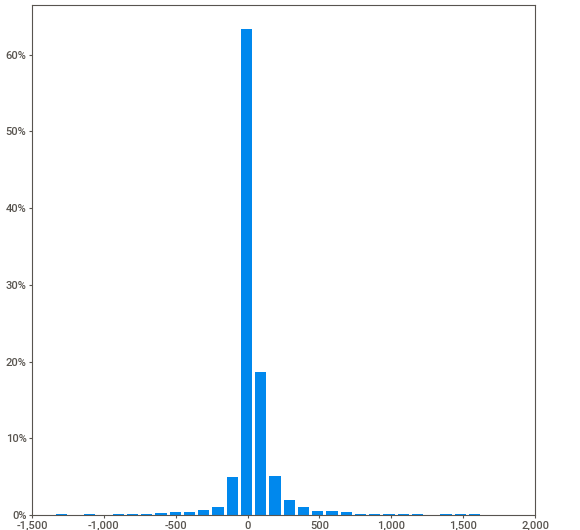
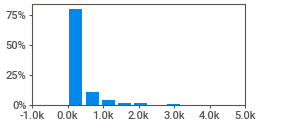
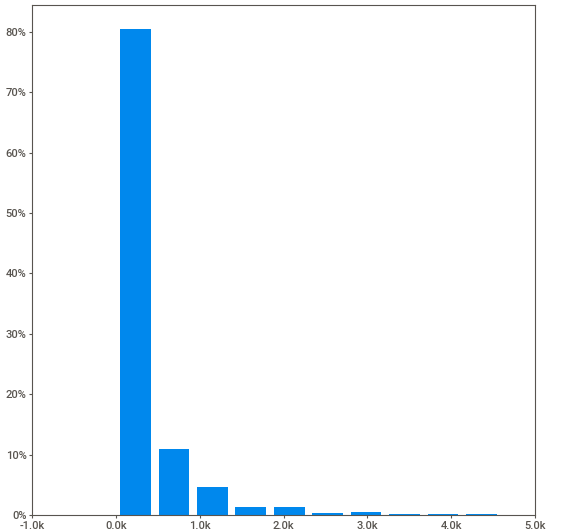
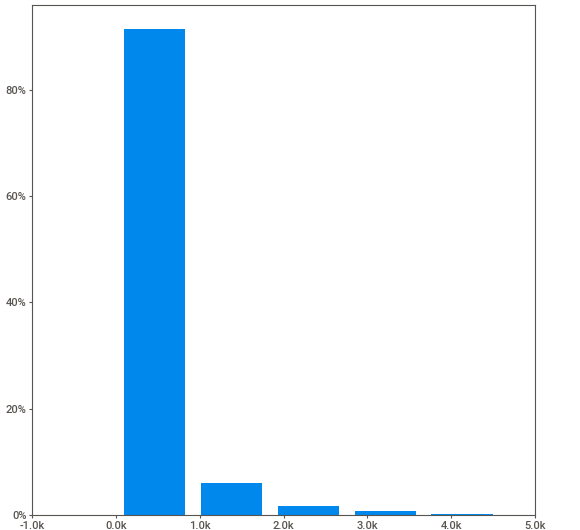
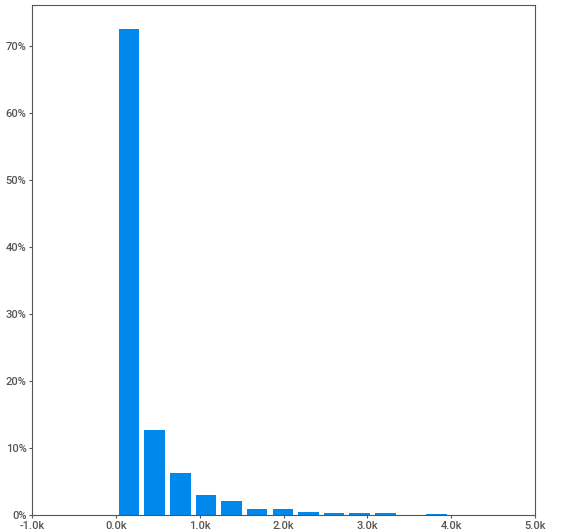
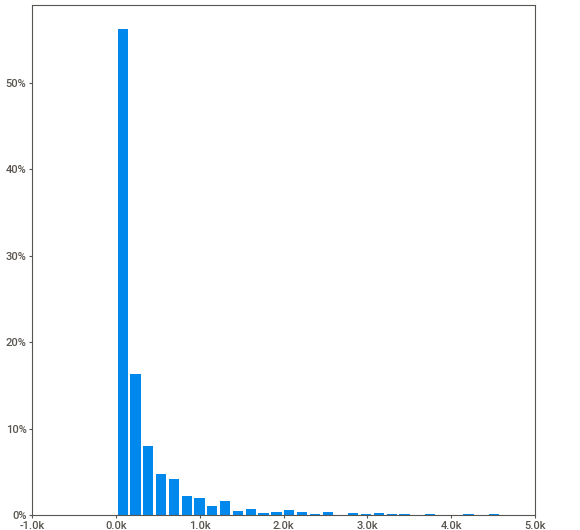
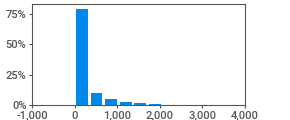
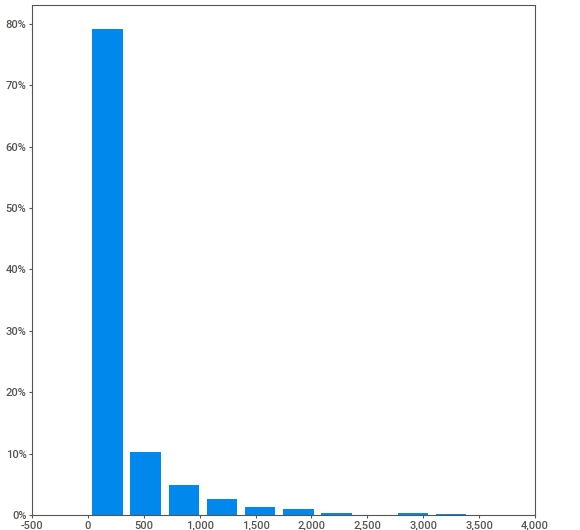
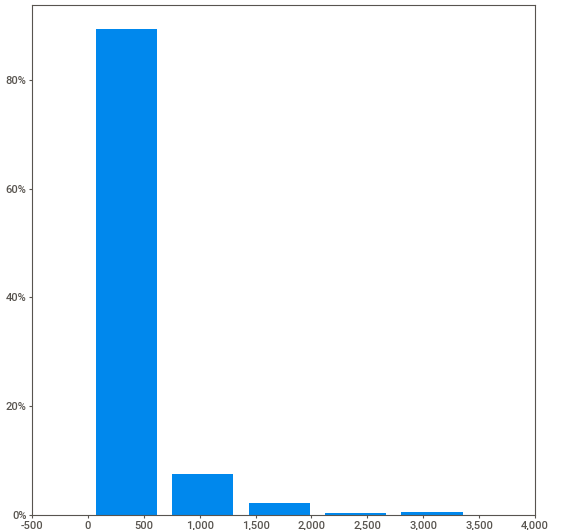
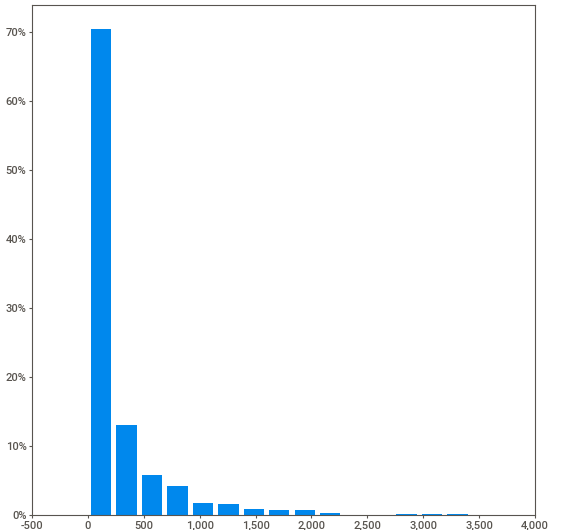
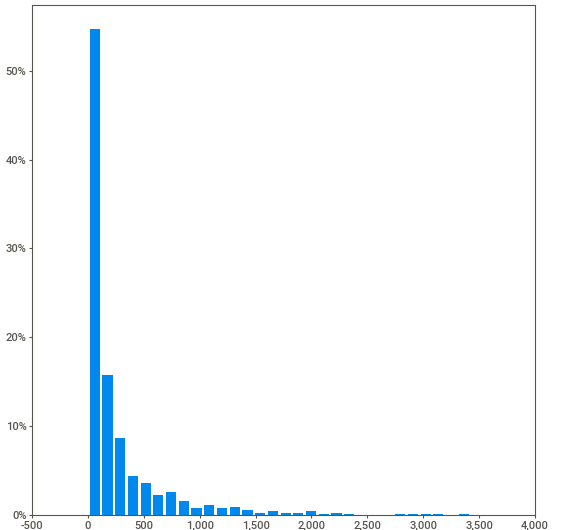
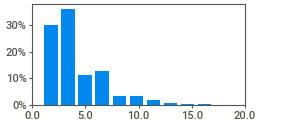
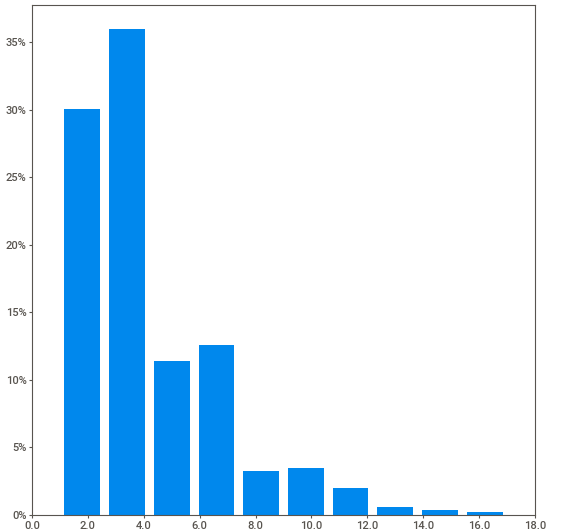
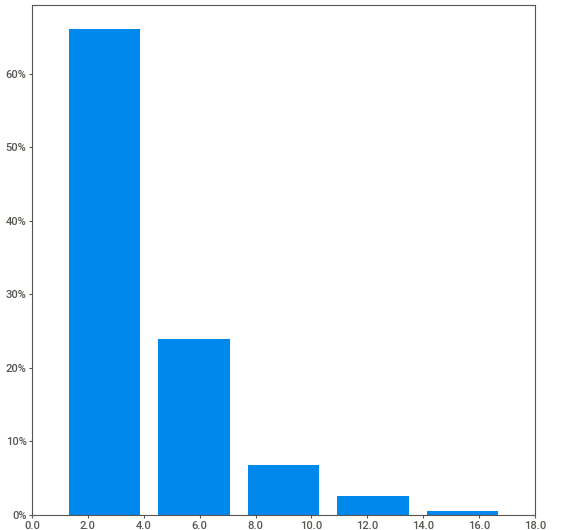
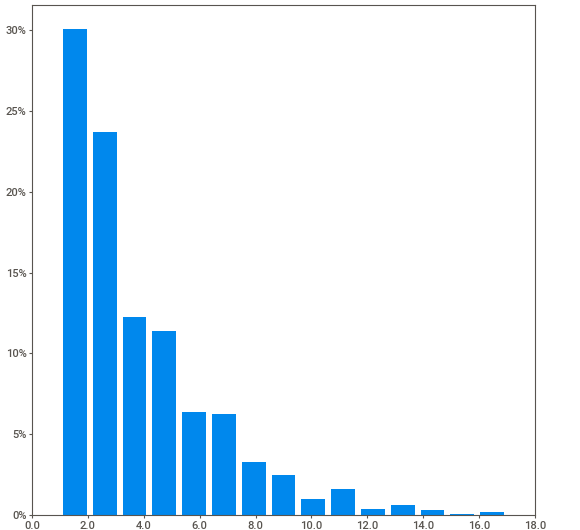
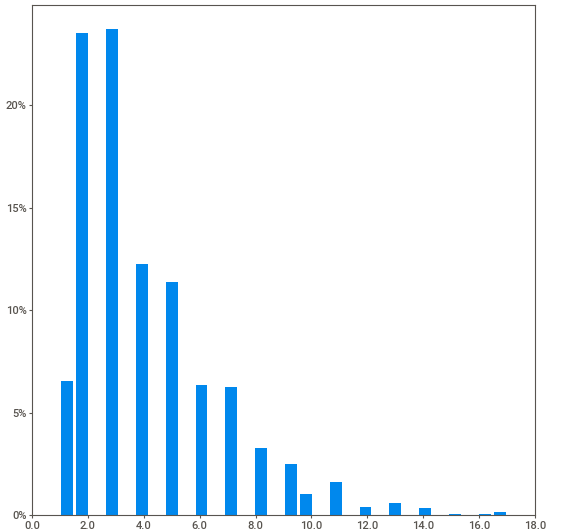
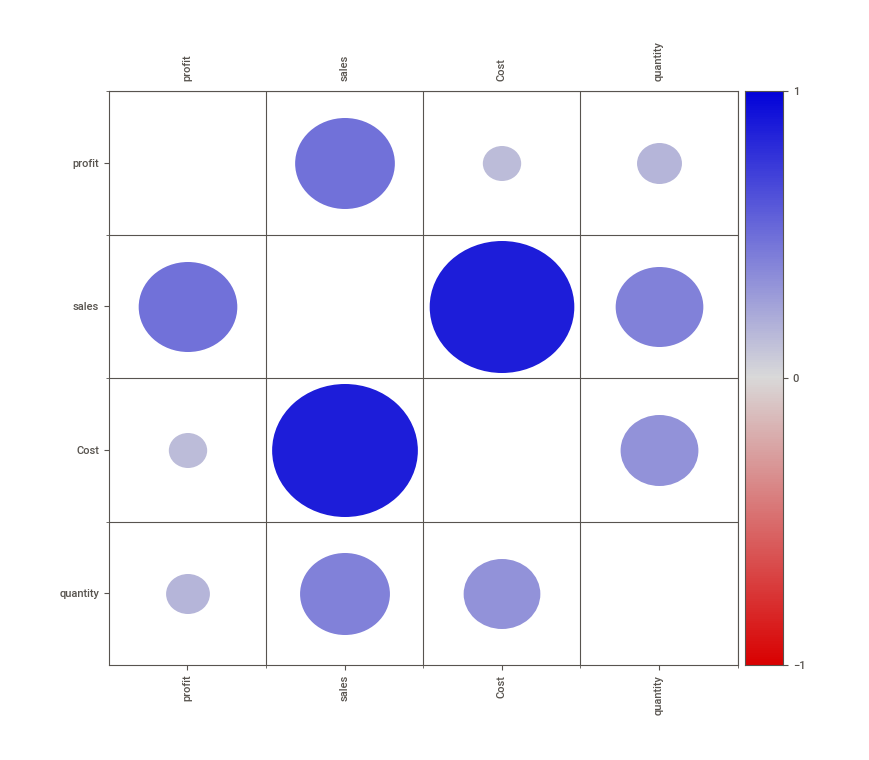
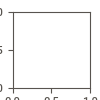

In [25]:
my_report.show_notebook()

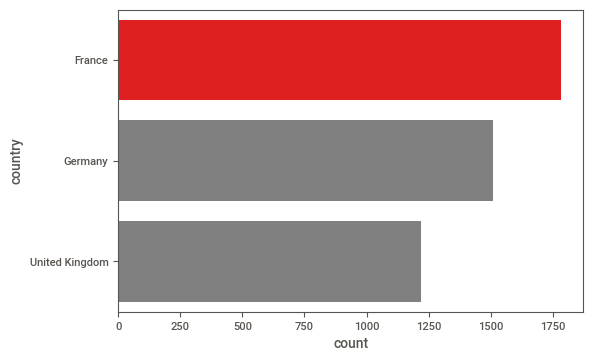

In [15]:
country = dataset.loc[dataset.country.isin(['France', 'Germany', 'United Kingdom'])]
sns.countplot(y='country', data=country, order=['France', 'Germany', 'United Kingdom'], palette=['Red', 'Grey', 'Grey'])
plt.show()
# country['country'].value_counts().index

# Autoviz

In [ ]:
!pip install autoviz

In [19]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set: (1493, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    19 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


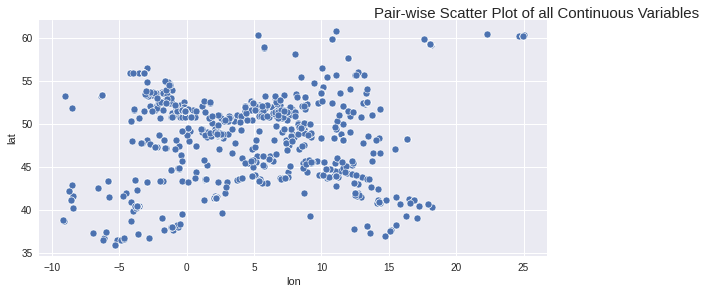

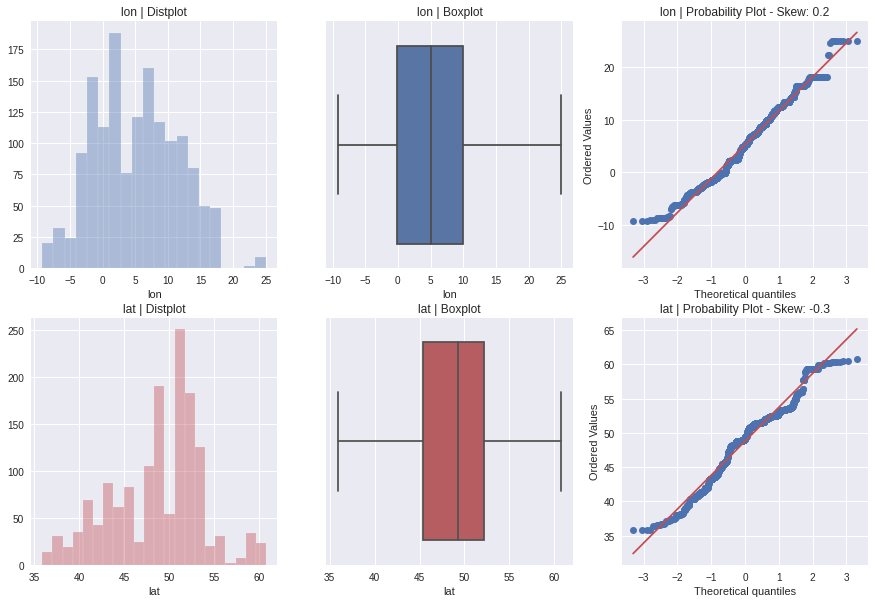

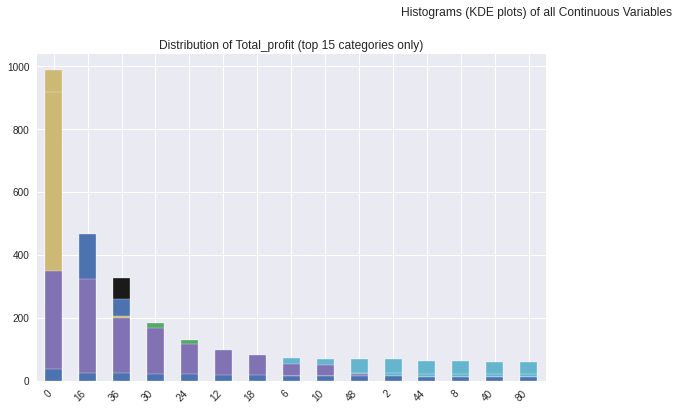

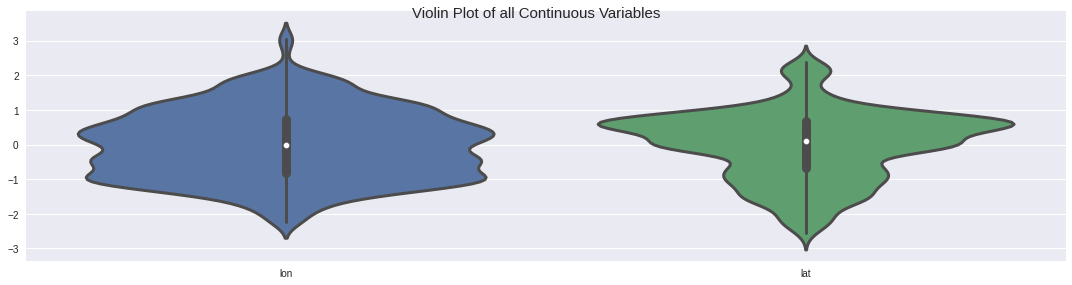

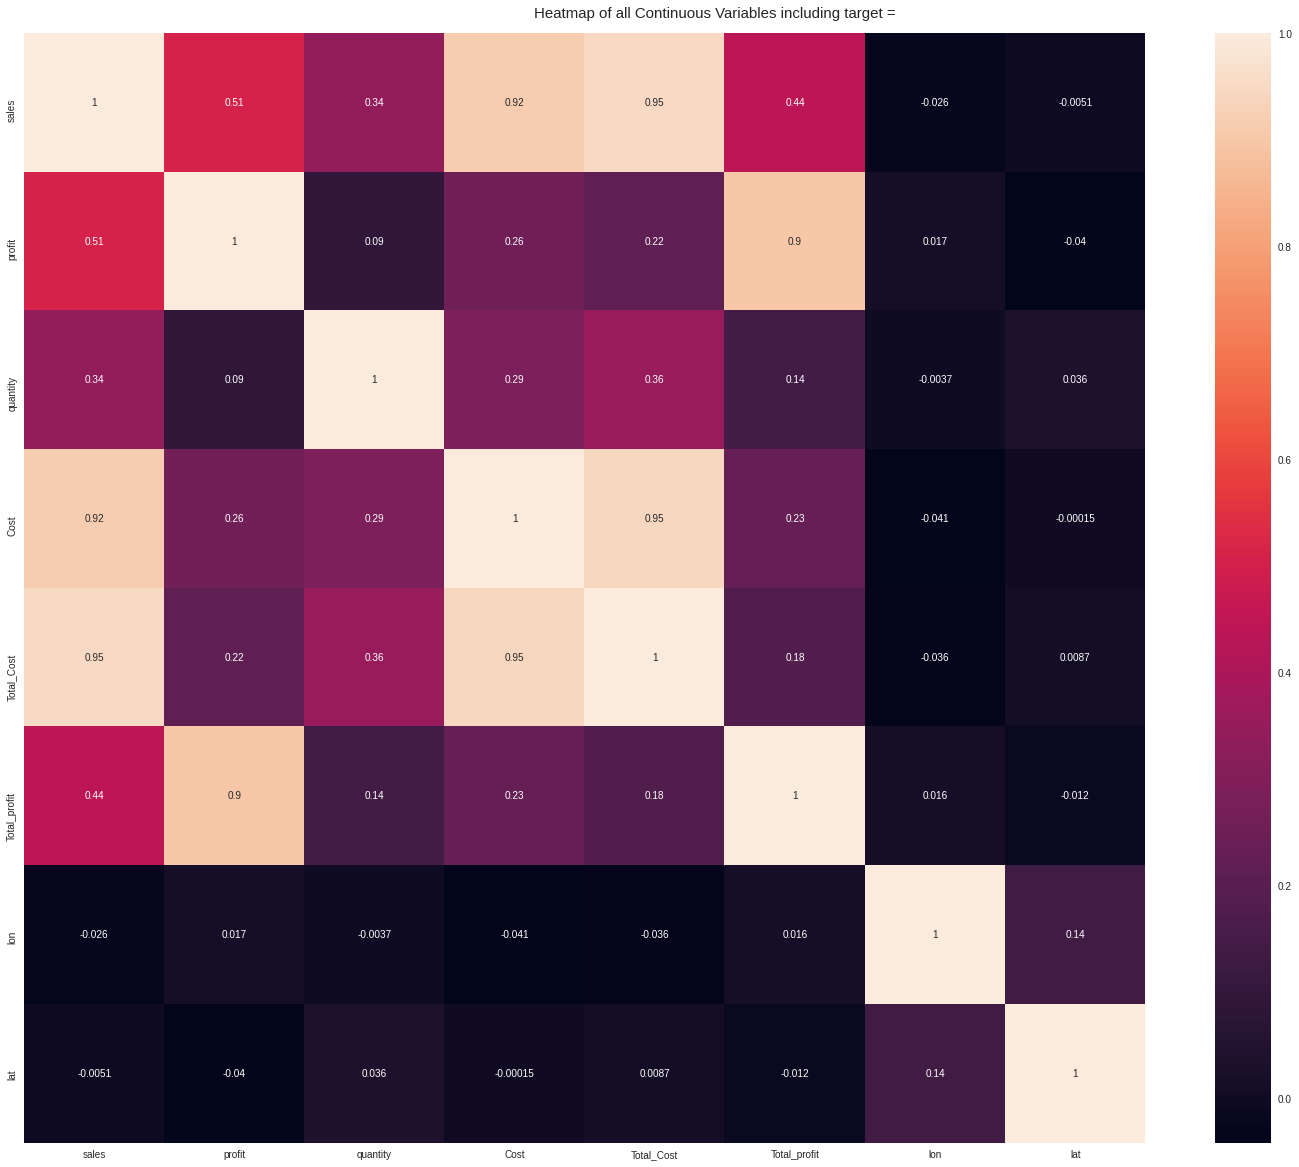

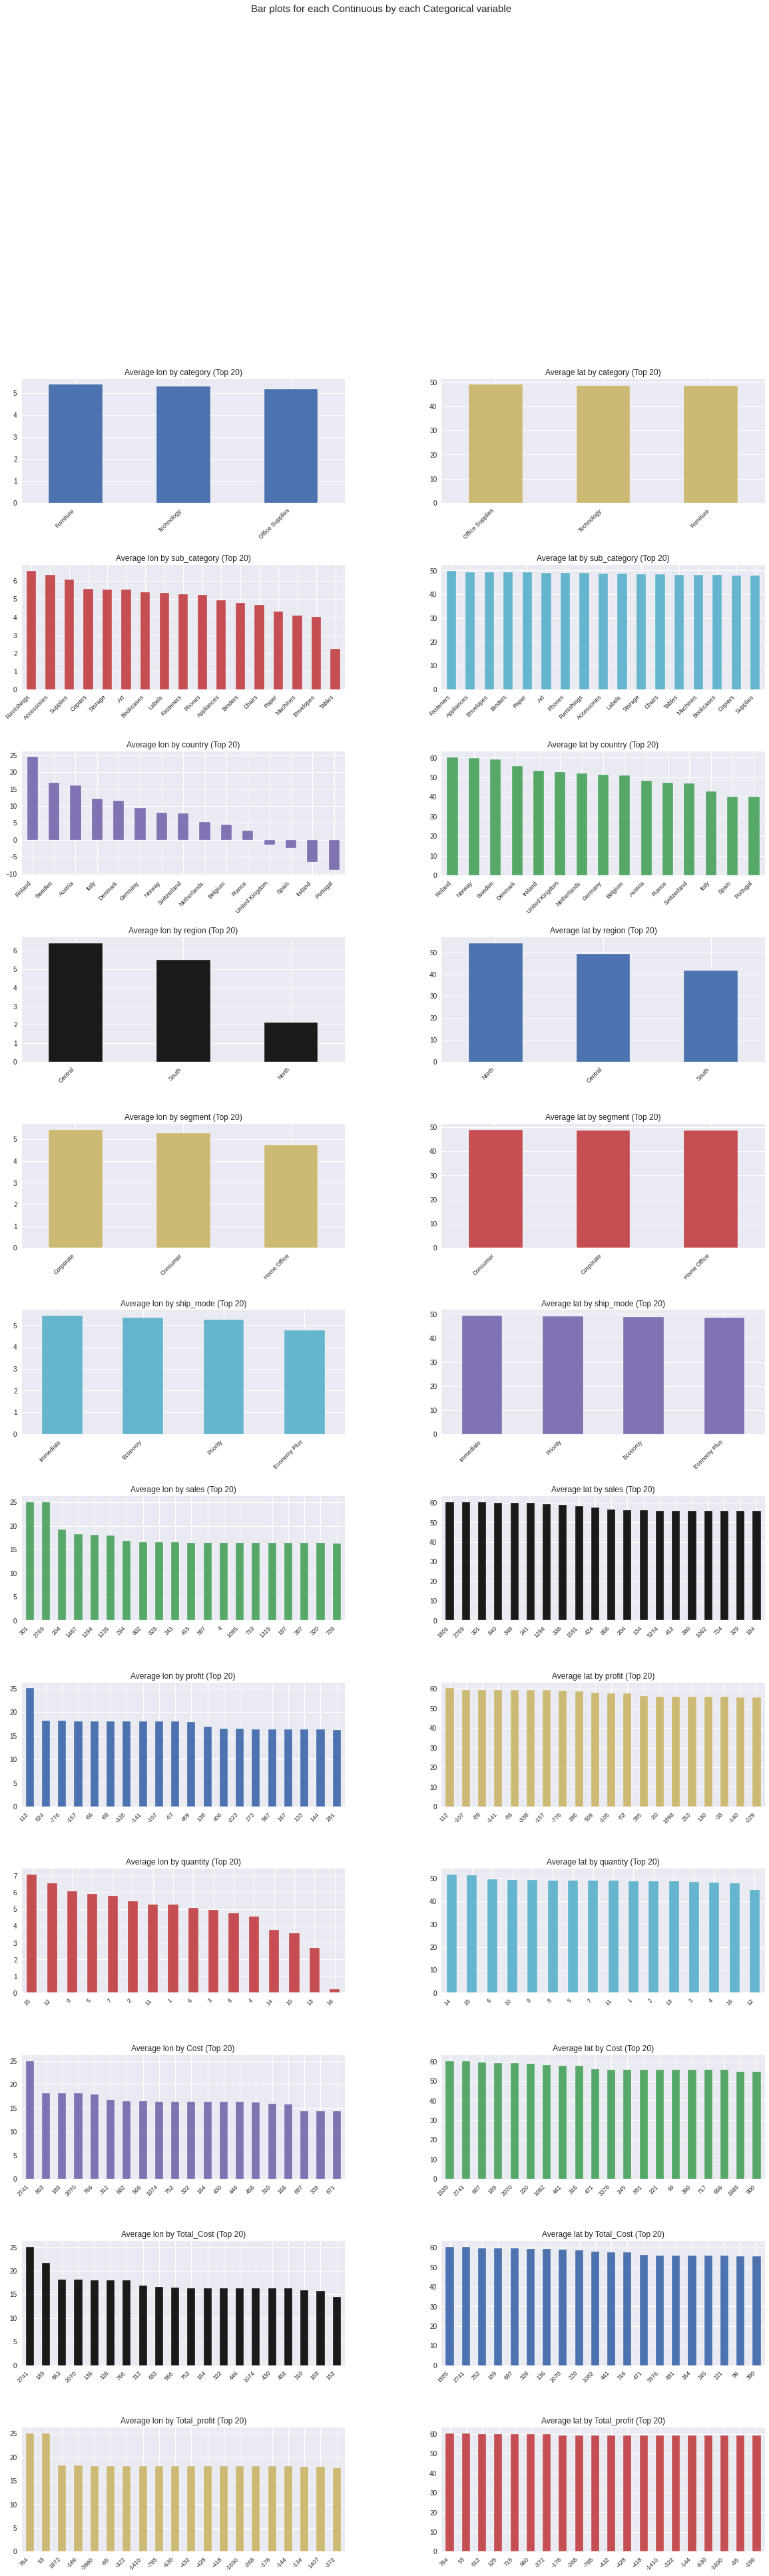

Time to run AutoViz (in seconds) = 10.669

 ###################### VISUALIZATION Completed ########################


In [23]:
df = AV.AutoViz('gdrive/My Drive/DigitalSkola/Dataset/sample.csv')

In [22]:
dataset.sample(frac=0.2).to_csv('gdrive/My Drive/DigitalSkola/Dataset/sample.csv', index=False)

# Plotly Express

In [28]:
import plotly.express as px

fig = px.violin(dataset, y='sales', x='category')
fig.show()

In [32]:
country = dataset.groupby(['country']).sum()['quantity'].reset_index()
px.bar(country, x='country', y='quantity').show()

In [35]:
df = px.data.gapminder()
df['world'] = 'world'
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,world
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,world
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,world
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,world
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,world
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,world


In [40]:
treemap = px.treemap(df, names=['world', 'continent', 'country'], values='pop')
treemap.show()

ValueError: ignored

# Folium

In [41]:
import folium

In [42]:
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339696
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


In [44]:
m = folium.Map(location=[51.339696, 12.373075])
m

In [47]:
px.density_mapbox(dataset.sample(frac=0.1), lat='lat', lon='lon').show()